# Tymoteusz Maj

# Raster Image Representation in Python

Raster data is a fundamental representation in geospatial analysis, where spatial information is stored as a grid of squares (pixels). Each pixel contains a numeric value corresponding to a specific attribute, such as brightness, color, or intensity, depending on the image type. These numeric values allow for various computational manipulations and visualizations of the image. In this section, we will explore how to create and manipulate raster images using NumPy arrays and visualize them using Python libraries such as Matplotlib and PIL.

## 1. Understanding Raster Data:
A raster image is essentially a 2D array where each element corresponds to a pixel. Each pixel holds a numeric value that determines its brightness or intensity. For standard 8-bit grayscale images, the range of pixel values is from 0 to 255:
- **0**: Represents black, the darkest shade.
- **255**: Represents white, the brightest shade.
- Intermediate values represent varying levels of gray between black and white.

This model of an image can be directly represented using `numpy` arrays, which are highly efficient for mathematical and matrix operations, making them an excellent tool for image processing tasks.

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from ipywidgets import interact
import requests
from io import BytesIO
from google.colab import drive

In [ ]:
# Set a seed for reproducibility
np.random.seed(24)

# Generate a 10x10 random array with values between 0 and 255 (8-bit image)
ar = np.random.randint(0, 255, (10, 10), dtype=np.uint8)

In [ ]:
# Display array properties for reference
print(ar)
print(f'\nArray Shape: {ar.shape}\nArray Data Type: {ar.dtype}')

[[162 177 195 245 131   3  96  75 192  56]
 [ 19 179  87 225 135  13 145  77 247 145]
 [232  70  81 129  84  86  56 100  25 228]
 [251 123  48 110  92 207  28  79 130   4]
 [ 56 102 189 239 175 132 201 227 184  23]
 [ 82 107  91 121 139  29 252  80 123 143]
 [100 158 227 149 244  34 115   7  78  70]
 [143 131  76  98 231 216  89 143  73 141]
 [ 13  82  18 231  50   5 119  91 205  93]
 [135 249  31 170 153 185 171 181 163 110]]

Array Shape: (10, 10)
Array Data Type: uint8


## Displaying the Array as an Image

The `plt.imshow()` function from Matplotlib is a versatile tool used to display data in the form of an image. It is especially useful for visualizing 2D arrays, such as raster data or images, where each element in the array corresponds to the color intensity of a pixel.

### Key Features of `plt.imshow()`:
- **Data as Images**: Displays a 2D array as a rasterized image where each element of the array corresponds to a pixel.
- **Color Mapping**: The `cmap` parameter allows you to choose different color maps to represent the data visually.
- **Interactivity**: The function allows for dynamic adjustments to the image display, such as scaling, color bar additions, and axis manipulation.

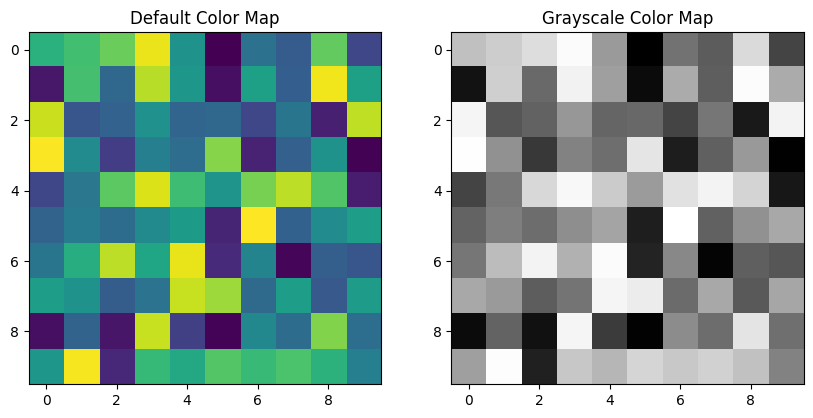

In [ ]:
# Display the array as an image using matplotlib's default color scheme and grayscale
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(ar)  # Default colors
plt.title("Default Color Map")
plt.subplot(1, 2, 2)
plt.imshow(ar, cmap=plt.cm.Greys_r)  # Grayscale color map
plt.title("Grayscale Color Map")
plt.show()

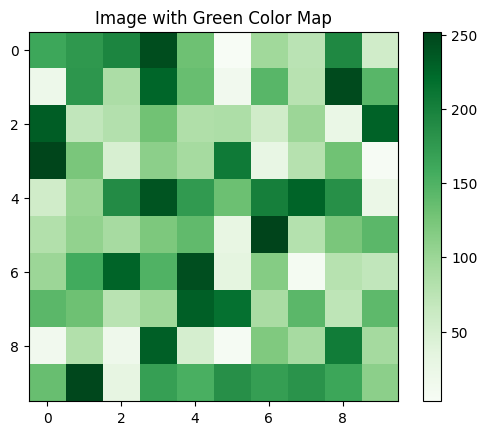

In [ ]:
# Display the image with a specific color map (Green) and a colorbar
plt.imshow(ar, cmap=plt.cm.Greens)
plt.colorbar()
plt.title("Image with Green Color Map")
plt.show()

## Displaying histogram of the image
   - What is the histogram of the image?
   - `plt.hist()` function [hist()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist)

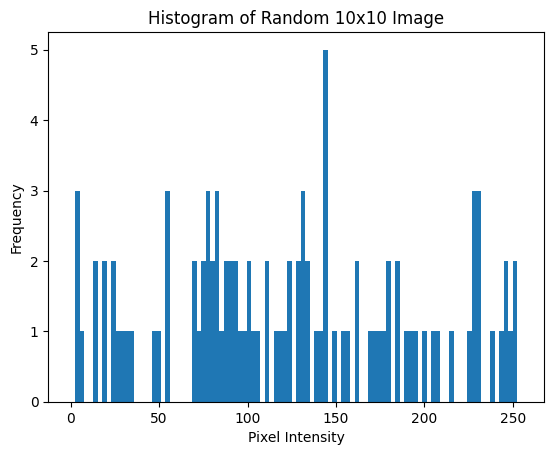

In [ ]:
# Plot histogram of pixel values
plt.hist(ar.ravel(), bins=100, range=(0, 255))
plt.title("Histogram of Random 10x10 Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Generate larger arrays with normal distribution and display them
ar_normal = np.random.normal(loc=100, scale=10, size=(100, 100))
ar_normal = np.clip(ar_normal, 0, 255)  # Clip values between 0 and 255 for valid pixel range

ar_normal_150 = np.random.normal(loc=100, scale=50, size=(100, 100))
ar_normal_150 = np.clip(ar_normal_150, 0, 255)

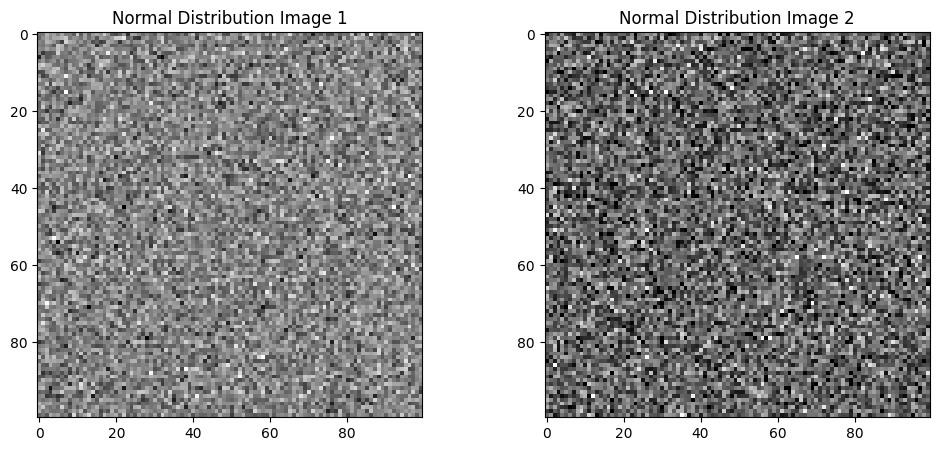

In [ ]:
# Display images and histograms for normal distributions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(ar_normal, cmap='gray')
plt.title("Normal Distribution Image 1")
plt.subplot(1, 2, 2)
plt.imshow(ar_normal_150, cmap='gray')
plt.title("Normal Distribution Image 2")
plt.show()

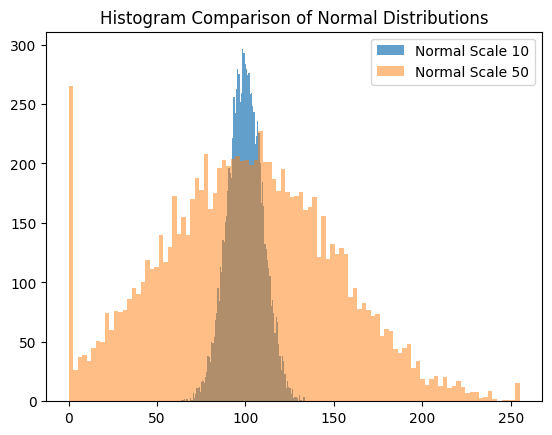

In [ ]:
# Display histograms for both normal distributions
plt.hist(ar_normal.flatten(), bins=100, alpha=0.7, label='Normal Scale 10')
plt.hist(ar_normal_150.flatten(), bins=100, alpha=0.5, label='Normal Scale 50')
plt.title("Histogram Comparison of Normal Distributions")
plt.legend()
plt.show()

## Save image

In [ ]:
# Save the random image as a .jpg file using PIL
im = Image.fromarray(ar)
im.save('random_10x10.jpg')

# Playing with spatial resolution

Creating 3 single-channel images with different shape:

 - 20 x 20 pixels
 - 50 x 50 pixels
 - 500 x 500 pixels

In [ ]:
# Experiment with images of varying resolutions
r20 = np.random.randint(0, 255, (20, 20), dtype=np.uint8)
r100 = np.random.randint(0, 255, (100, 100), dtype=np.uint8)
r500 = np.random.randint(0, 255, (500, 500), dtype=np.uint8)

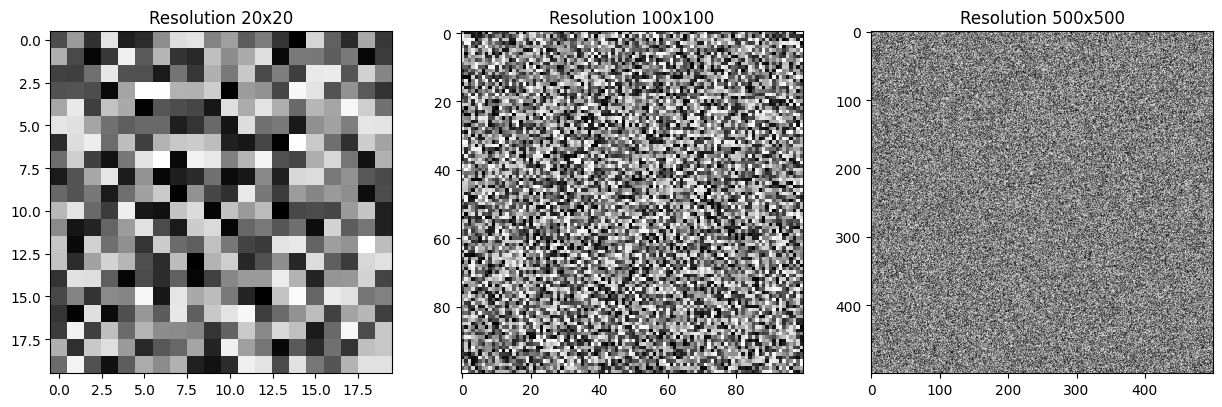

In [ ]:
# Titles for the images with different resolutions
titles = ['Resolution 20x20', 'Resolution 100x100', 'Resolution 500x500']

# Display the images with different resolutions
plt.figure(figsize=(15, 5))
for i, img in enumerate([r20, r100, r500], 1):
    plt.subplot(1, 3, i)
    plt.imshow(img, cmap='gray')
    plt.title(titles[i - 1])
plt.show()


In [ ]:
# Interactive function to display images with varying resolutions
def resolution_test(res: int):
    ar = np.random.randint(0, 255, (res, res), dtype=np.uint8)
    plt.imshow(ar, cmap='gray')
    plt.title(f'Random Image with Resolution {res}x{res}')
    plt.show()

In [ ]:
# Use ipywidgets for interactive resolution selection
interact(resolution_test, res=(50, 500))

interactive(children=(IntSlider(value=275, description='res', max=500, min=50), Output()), _dom_classes=('widg…

<function __main__.resolution_test(res: int)>

# Image transformation and manipulation

In [55]:
# # Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

In [58]:
# # Load an Image from the Internet
image_url = 'https://cdn.pixabay.com/photo/2018/01/14/23/12/nature-3082832_1280.jpg'  # URL of a DRM free image
response = requests.get(image_url)  # Send a GET request to the URL

# # Check if the request was successful
if response.status_code == 200:
    try:
        image = Image.open(BytesIO(response.content))  # Open the image from the response content
    except UnidentifiedImageError:
        print("Error: The image could not be identified. Please check the URL or the image format.")
else:
    print(f"Error: Unable to retrieve image. Status code: {response.status_code}")

Image Shape: (720, 1280, 3)
Data Type: uint8
Min Value: 0
Max Value: 255


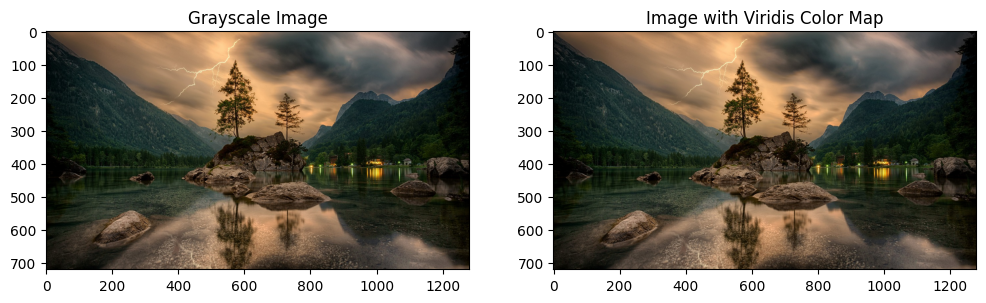

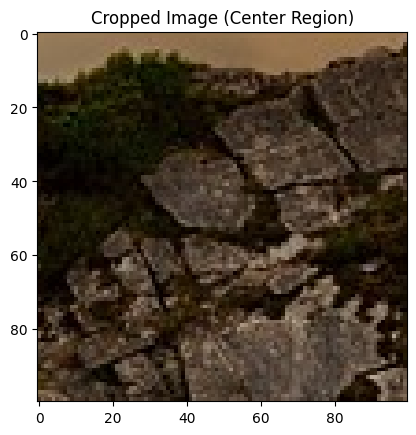

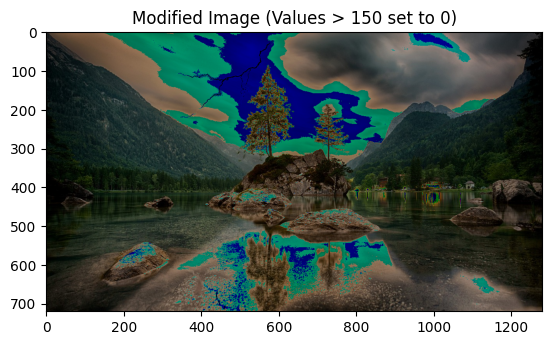

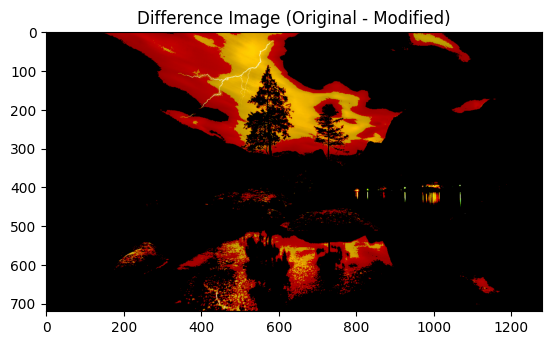

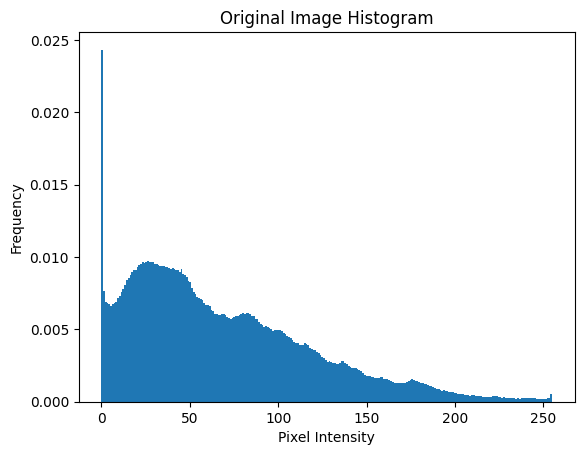

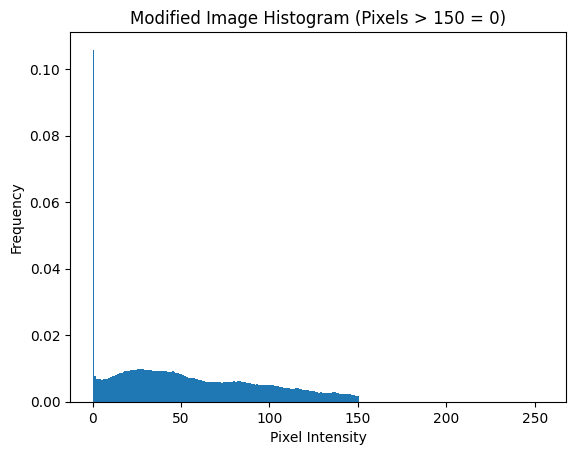

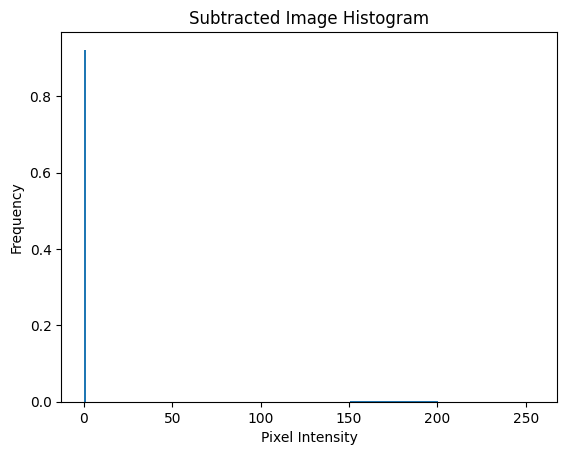

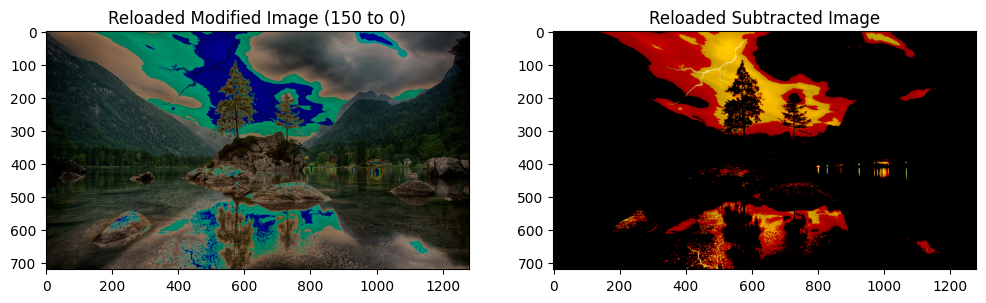

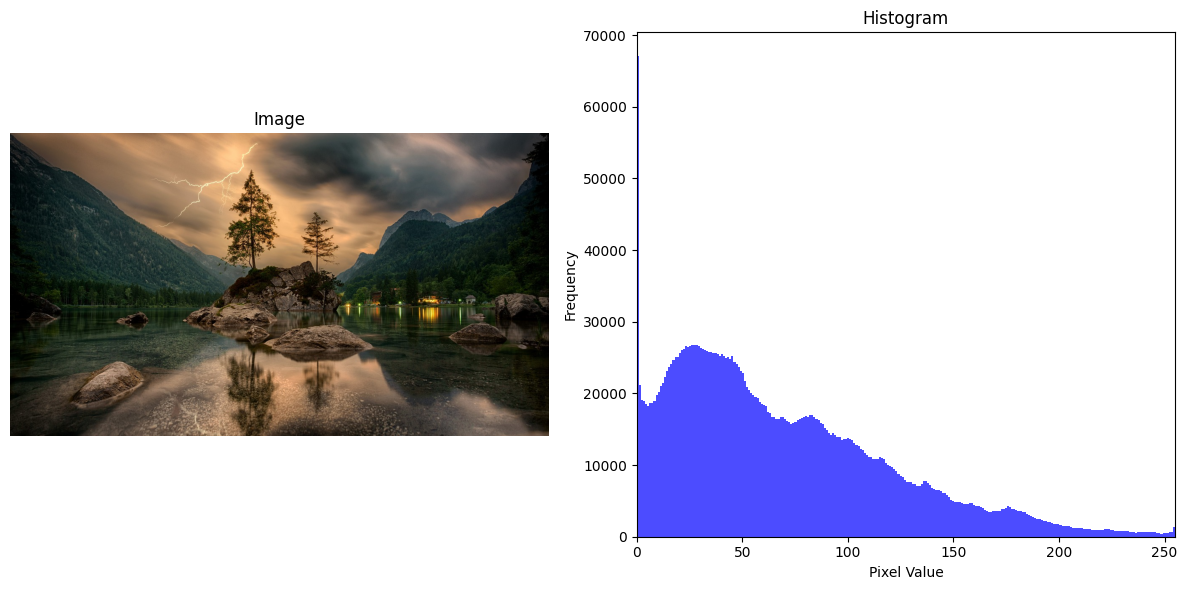

In [60]:
# # Convert Image to NumPy Array
# This allows for manipulation and processing of pixel values.
if 'image' in locals():
    img_array = np.array(image)

    # # Display Basic Information about the Image
    print(f"Image Shape: {img_array.shape}")  # Dimensions of the image
    print(f"Data Type: {img_array.dtype}")    # Data type of pixel values
    print(f"Min Value: {img_array.min()}")    # Minimum pixel intensity
    print(f"Max Value: {img_array.max()}")    # Maximum pixel intensity

    # # Display the Image in Different Color Maps
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img_array, cmap='gray')  # Display grayscale version
    plt.title('Grayscale Image')
    plt.subplot(1, 2, 2)
    plt.imshow(img_array, cmap='viridis')  # Display image with Viridis color map
    plt.title('Image with Viridis Color Map')
    plt.show()

    # # Crop a Specific Region of the Image
    # This allows for focusing on a square area in the center of the image.
    center_x, center_y = img_array.shape[1] // 2, img_array.shape[0] // 2  # Find center coordinates
    square_size = 100  # Define the size of the square to crop (e.g., 100x100 pixels)
    half_size = square_size // 2  # Calculate half the size for cropping

    # Crop the center square
    cropped_img = img_array[center_y - half_size:center_y + half_size, center_x - half_size:center_x + half_size]
    plt.imshow(cropped_img, cmap='gray')
    plt.title('Cropped Image (Center Region)')
    plt.show()

    # # Modify the Original Image Array
    # Set pixel values greater than 150 to 0, highlighting areas of interest.
    img_array_copy = np.copy(img_array)
    modified_img_array = np.where(img_array > 150, 0, img_array)

    # # Display the Modified Image
    plt.imshow(modified_img_array, cmap='gray')
    plt.title('Modified Image (Values > 150 set to 0)')
    plt.show()

    # # Calculate and Display the Difference Image
    # This highlights the differences between the original and modified images.
    subtracted_img_array = img_array - modified_img_array
    plt.imshow(subtracted_img_array, cmap='gray')
    plt.title('Difference Image (Original - Modified)')
    plt.show()

    # # Plot Histograms for Different Image States
    def plot_histogram(image_array, title):
        plt.hist(image_array.ravel(), bins=256, range=(0, 255), density=True)  # Plot histogram
        plt.title(title)
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Frequency")
        plt.show()

    plot_histogram(img_array, 'Original Image Histogram')  # Histogram of the original image
    plot_histogram(modified_img_array, 'Modified Image Histogram (Pixels > 150 = 0)')  # Histogram of modified image
    plot_histogram(subtracted_img_array, 'Subtracted Image Histogram')  # Histogram of the difference image

    # # Save the Modified and Subtracted Images
    modified_img = Image.fromarray(modified_img_array)
    modified_img.save('modified_image_150_to_0.png')  # Save modified image

    subtracted_img = Image.fromarray(subtracted_img_array)
    subtracted_img.save('subtracted_image.png')  # Save subtracted image

    # # Reload and Display the Saved Images
    loaded_modified_img = Image.open('modified_image_150_to_0.png')  # Reload modified image
    loaded_subtracted_img = Image.open('subtracted_image.png')  # Reload subtracted image

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(np.array(loaded_modified_img), cmap='gray')
    plt.title('Reloaded Modified Image (150 to 0)')
    plt.subplot(1, 2, 2)
    plt.imshow(np.array(loaded_subtracted_img), cmap='gray')
    plt.title('Reloaded Subtracted Image')
    plt.show()

    # # Display Image Alongside Its Histogram
    # This visualizes the image with its corresponding histogram for easier analysis.
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(img_array, cmap='gray')
    ax[0].set_title('Image')
    ax[0].axis('off')
    ax[1].hist(img_array.ravel(), bins=256, range=(0, 255), color='blue', alpha=0.7)
    ax[1].set_title('Histogram')
    ax[1].set_xlim([0, 255])
    ax[1].set_xlabel('Pixel Value')
    ax[1].set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()
else:
    print("The image could not be loaded successfully.")
